<a href="https://colab.research.google.com/github/dimartinezr/Challenge_TelecomX_2_Alura/blob/main/TelecomX_2_ModeloPredictivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparación de los datos

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
import yellowbrick

In [129]:
df = pd.read_csv('/content/datos_tratados.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   customerID                                       7043 non-null   object 
 1   Churn                                            7043 non-null   int64  
 2   customer_gender                                  7043 non-null   int64  
 3   customer_SeniorCitizen                           7043 non-null   int64  
 4   customer_Partner                                 7043 non-null   int64  
 5   customer_Dependents                              7043 non-null   int64  
 6   customer_tenure                                  7043 non-null   int64  
 7   phone_PhoneService                               7043 non-null   int64  
 8   phone_MultipleLines                              7043 non-null   int64  
 9   internet_OnlineSecurity       

In [130]:
#Eliminación de columnas irrelevantes

df = df.drop('customerID', axis=1)
df = df.drop('account_Charges.Monthly', axis=1)


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Churn                                            7043 non-null   int64  
 1   customer_gender                                  7043 non-null   int64  
 2   customer_SeniorCitizen                           7043 non-null   int64  
 3   customer_Partner                                 7043 non-null   int64  
 4   customer_Dependents                              7043 non-null   int64  
 5   customer_tenure                                  7043 non-null   int64  
 6   phone_PhoneService                               7043 non-null   int64  
 7   phone_MultipleLines                              7043 non-null   int64  
 8   internet_OnlineSecurity                          7043 non-null   int64  
 9   internet_OnlineBackup         

In [133]:
df['Churn'].value_counts(normalize=True).round(4)*100

,proportion
Churn,
0,73.46
1,26.54


#Correlación de Variables Numéricas

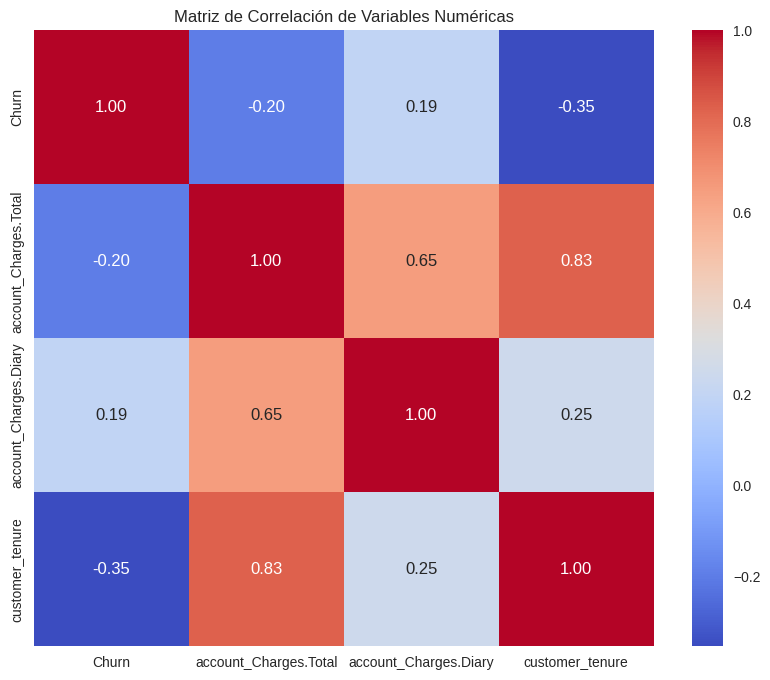

In [134]:
# Calcular la matriz de correlación

df_numericas = df[['Churn', 'account_Charges.Total', 'account_Charges.Diary', 'customer_tenure']]
correlation_matrix = df_numericas.corr()

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

#Modelado Predictivo

In [135]:
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

In [136]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [137]:

# Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [138]:
# ======================
# Balanceo
# ======================
# Oversampling
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)


In [139]:
# Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

In [140]:

# Función para métricas de clasificación

def calcular_clasificacion(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, average="weighted", zero_division=0),
        "recall": recall_score(y_true, y_pred, average="weighted", zero_division=0),
        "f1_score": f1_score(y_true, y_pred, average="weighted", zero_division=0)
    }

In [141]:
# ======================
# Modelos
# ======================
# Dummy baseline
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
resultados_dummy = calcular_clasificacion(y_test, y_pred_dummy)

In [142]:
# Random Forest - Sin balanceo
rf_nb = RandomForestClassifier(max_depth=5, random_state=42)
rf_nb.fit(X_train, y_train)
y_pred_nb = rf_nb.predict(X_test)
resultados_rf_nb = calcular_clasificacion(y_test, y_pred_nb)

In [143]:
# Random Forest - Oversampling
rf_over = RandomForestClassifier(max_depth=5, random_state=42)
rf_over.fit(X_train_over, y_train_over)
y_pred_over = rf_over.predict(X_test)
resultados_rf_over = calcular_clasificacion(y_test, y_pred_over)

In [144]:
# Random Forest - Undersampling
rf_under = RandomForestClassifier(max_depth=5, random_state=42)
rf_under.fit(X_train_under, y_train_under)
y_pred_under = rf_under.predict(X_test)
resultados_rf_under = calcular_clasificacion(y_test, y_pred_under)

In [145]:
# Resultados

df_resultados = pd.DataFrame({
    "Dummy": resultados_dummy,
    "RF_Sin_Balanceo": resultados_rf_nb,
    "RF_Oversampling": resultados_rf_over,
    "RF_Undersampling": resultados_rf_under
}).T

print(df_resultados)

                  accuracy  precision    recall  f1_score
Dummy             0.734501   0.539491  0.734501  0.622071
RF_Sin_Balanceo   0.793185   0.779807  0.793185  0.779793
RF_Oversampling   0.752958   0.801291  0.752958  0.765149
RF_Undersampling  0.739233   0.799657  0.739233  0.753162


In [146]:
#Matrices de Confusión

from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Predicho Permanecen", "Predicho Bajas"],
                yticklabels=["Real Permanecen", "Real Bajas"])
    plt.title(title)
    plt.ylabel("Real")
    plt.xlabel("Predicho")
    plt.show()

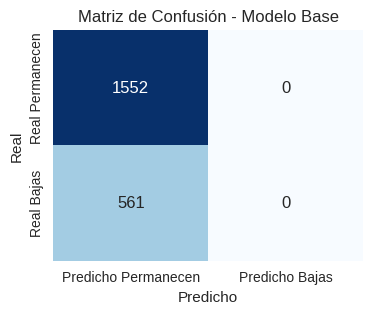

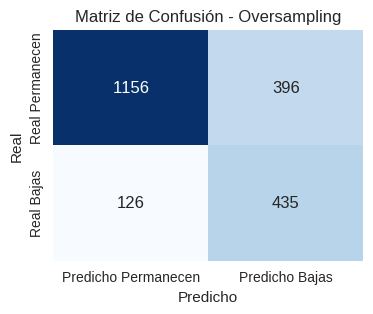

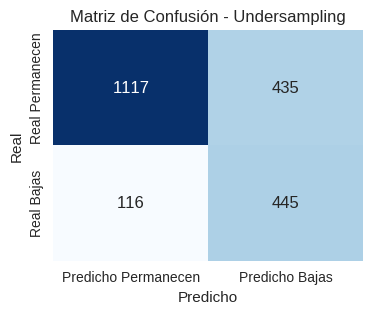

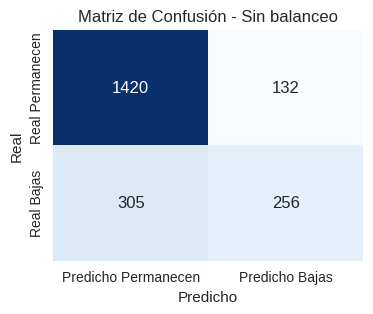

In [147]:
# Modelo base
plot_conf_matrix(y_test, y_pred_dummy, "Matriz de Confusión - Modelo Base")

# Oversampling RF
plot_conf_matrix(y_test, y_pred_over, "Matriz de Confusión - Oversampling")

# Undersampling RF
plot_conf_matrix(y_test, y_pred_under, "Matriz de Confusión - Undersampling")

# Sin Balanceo RF
plot_conf_matrix(y_test, y_pred_nb, "Matriz de Confusión - Sin balanceo")

In [148]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

def plot_curves(y_test, y_probs_dict):
    """
    Dibuja las curvas ROC y Precision-Recall para varios modelos.

    Parámetros:
    -----------
    y_test: array-like
        Valores reales de la variable dependiente (0/1).

    y_probs_dict: dict
        Diccionario con nombre del modelo como clave y probabilidades predichas como valor.
        Ejemplo:
        {
            "Modelo Base": y_proba_dummy,
            "Oversampling": y_proba_over,
            "Undersampling": y_proba_under,
            "Sin balanceo": y_proba_nb
        }
    """
    plt.figure(figsize=(14,6))

    # --- Curva ROC ---
    plt.subplot(1,2,1)
    for name, y_probs in y_probs_dict.items():
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("Tasa de Falsos Positivos (FPR)")
    plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
    plt.title("Curvas ROC")
    plt.legend()

    # --- Curva Precision-Recall ---
    plt.subplot(1,2,2)
    for name, y_probs in y_probs_dict.items():
        precision, recall, _ = precision_recall_curve(y_test, y_probs)
        ap = average_precision_score(y_test, y_probs)
        plt.plot(recall, precision, label=f"{name} (AP = {ap:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Curvas Precision-Recall")
    plt.legend()

    plt.tight_layout()
    plt.show()

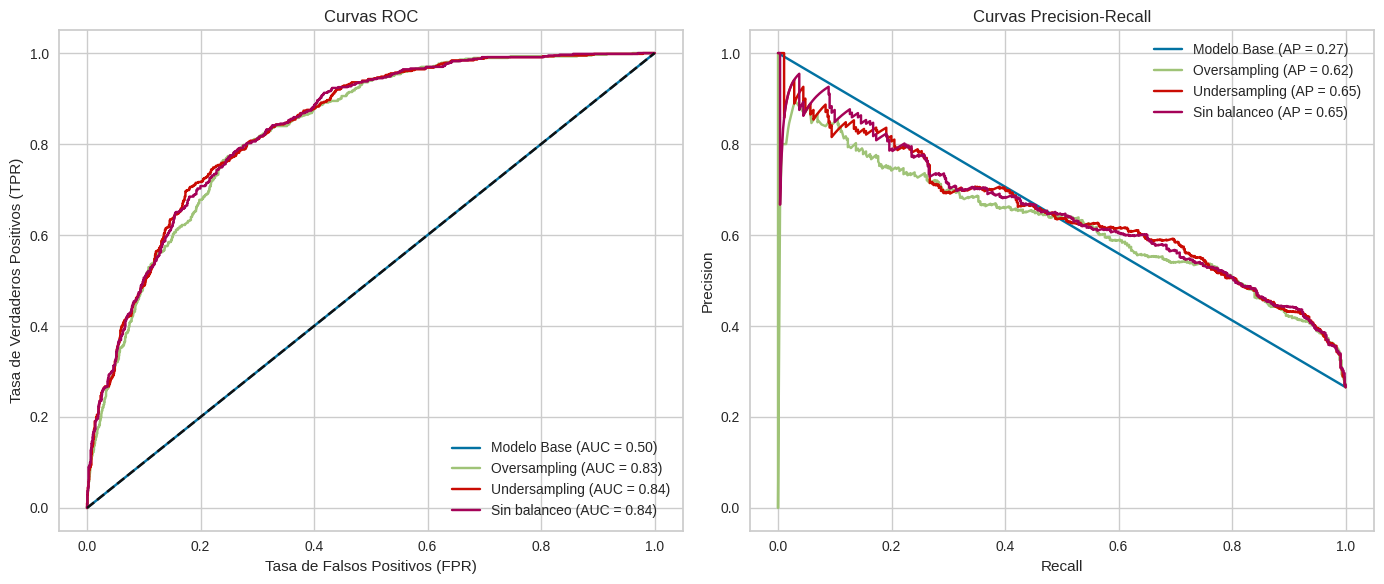

In [149]:
# Probabilidades (clase positiva = 1)
y_proba_dummy = dummy.predict_proba(X_test)[:,1]
y_proba_over  = rf_over.predict_proba(X_test)[:,1]
y_proba_under = rf_under.predict_proba(X_test)[:,1]
y_proba_nb    = rf_nb.predict_proba(X_test)[:,1]

# Diccionario de modelos
model_probs = {
    "Modelo Base": y_proba_dummy,
    "Oversampling": y_proba_over,
    "Undersampling": y_proba_under,
    "Sin balanceo": y_proba_nb
}

# Visualización
plot_curves(y_test, model_probs)

In [150]:
#Validación Cruzada

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score
import numpy as np
import scipy.stats as st

In [151]:
def cross_validate_model(model, X, y, k=5, oversample=None, undersample=None):
    """
    Ejecuta validación cruzada con K-Fold y calcula recall en cada fold.

    Parámetros:
    -----------
    model : modelo sklearn
        Modelo a validar.
    X, y : DataFrame, Series
        Variables independientes y dependiente.
    k : int
        Número de folds.
    oversample, undersample : objeto de imblearn (opcional)
        Si se especifica, aplica re-muestreo en cada fold.
    """
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    recalls = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # aplicar oversampling o undersampling si corresponde
        if oversample:
            X_train, y_train = oversample.fit_resample(X_train, y_train)
        elif undersample:
            X_train, y_train = undersample.fit_resample(X_train, y_train)

        # entrenar y predecir
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # calcular recall para la clase positiva (churn=1)
        recall = recall_score(y_test, y_pred, pos_label=1)
        recalls.append(recall)

    # estadísticos
    mean_recall = np.mean(recalls)
    ci_low, ci_high = st.t.interval(
    confidence=0.95, df=len(recalls)-1, loc=np.mean(recalls), scale=st.sem(recalls)
    )

    return mean_recall, (ci_low, ci_high), recalls

In [152]:
rf = RandomForestClassifier(max_depth=5, random_state=42)
dummy = DummyClassifier(strategy="most_frequent", random_state=42)

# Oversampler y undersampler
smote = SMOTE(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

# Resultados
resultados_cv = {}

resultados_cv["Dummy"] = cross_validate_model(dummy, X, y, k=5)
resultados_cv["RF_Sin_Balanceo"] = cross_validate_model(rf, X, y, k=5)
resultados_cv["RF_Oversampling"] = cross_validate_model(rf, X, y, k=5, oversample=smote)
resultados_cv["RF_Undersampling"] = cross_validate_model(rf, X, y, k=5, undersample=undersampler)

# Mostrar resultados
for modelo, (mean_recall, ci, recalls) in resultados_cv.items():
    print(f"{modelo}: Recall medio={mean_recall:.3f}, IC95%=[{ci[0]:.3f}, {ci[1]:.3f}]")

Dummy: Recall medio=0.000, IC95%=[nan, nan]
RF_Sin_Balanceo: Recall medio=0.430, IC95%=[0.374, 0.485]
RF_Oversampling: Recall medio=0.769, IC95%=[0.750, 0.789]
RF_Undersampling: Recall medio=0.820, IC95%=[0.806, 0.834]


In [153]:
#Se decide continuar con el modelo "RF_Udersampling" y se procede a tratar de hacerlo mas compacto

from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier

# Ordenar las variables por importancia
df_importancias = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf_under.feature_importances_
}).sort_values(by="Importancia", ascending=False)

df_importancias


,Variable,Importancia
18,account_Contract_Month-to-month,0.225766
4,customer_tenure,0.156133
20,account_Contract_Two year,0.113454
16,internet_InternetService_Fiber optic,0.102526
14,account_Charges.Total,0.080413
25,account_Charges.Diary,0.067715
23,account_PaymentMethod_Electronic check,0.048986
17,internet_InternetService_No,0.042327
19,account_Contract_One year,0.036111
10,internet_TechSupport,0.017871


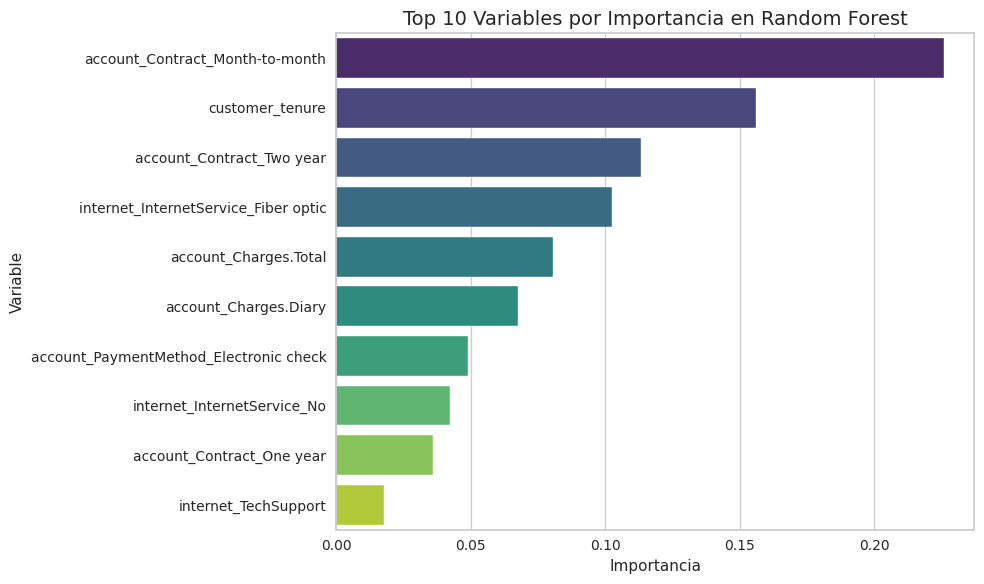

In [165]:
top10 = df_importancias.head(10)

sns.set_style("whitegrid")

# Crear gráfico de barras horizontal
plt.figure(figsize=(10,6))
sns.barplot(
    x='Importancia',
    y='Variable',
    data=top10,
    palette='viridis'
)

plt.title('Top 10 Variables por Importancia en Random Forest', fontsize=14)
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1035
           1       0.51      0.81      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



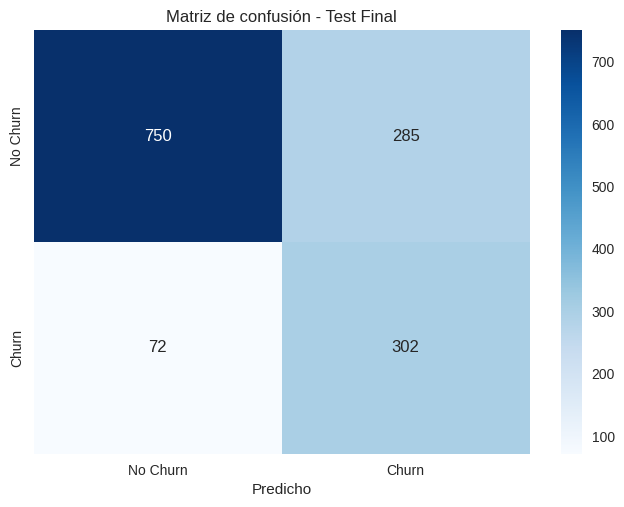

In [159]:
#Testeo final para "RF_Undersampling"

# Dividir dataset en entrenamiento (80%) y test final (20%)
X_train, X_test_final, y_train, y_test_final = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar undersampling SOLO en entrenamiento
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Entrenar modelo final con undersampling
rf_final = RandomForestClassifier(max_depth=5, random_state=42)
rf_final.fit(X_train_under, y_train_under)

# Predecir en test final (sin undersampling)
y_pred_final = rf_final.predict(X_test_final)


In [160]:
# Reporte de métricas
print(classification_report(y_test_final, y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1035
           1       0.51      0.81      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



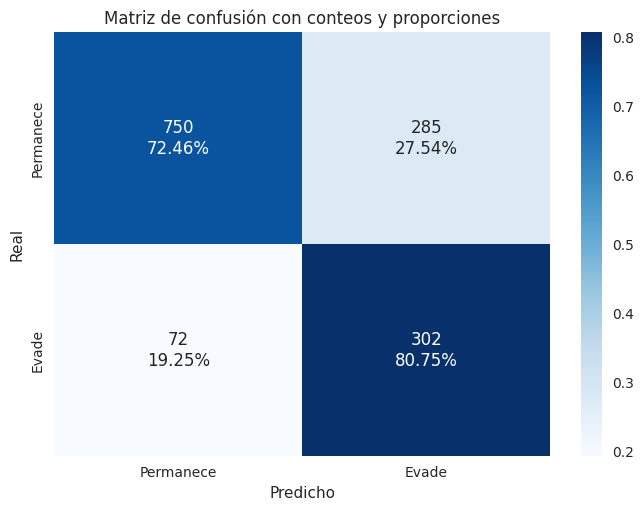

In [166]:
#Matriz

cm = confusion_matrix(y_test_final, y_pred_final)
cm_prop = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

labels = np.array([f"{v}\n{p:.2%}" for v, p in zip(cm.flatten(), cm_prop.flatten())])
labels = labels.reshape(2,2)

sns.heatmap(cm_prop, annot=labels, fmt="", cmap="Blues",
            xticklabels=["Permanece","Evade"],
            yticklabels=["Permanece","Evade"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusión con conteos y proporciones")
plt.show()

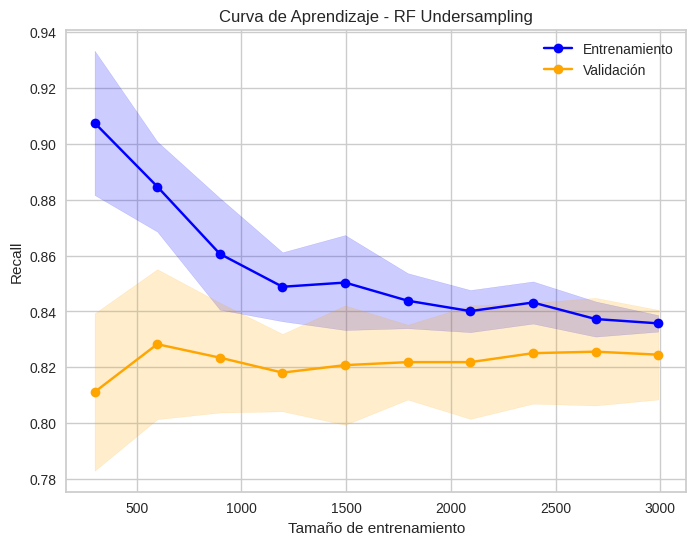

In [163]:
#Curva de Aprendizaje para visualizar riesgo de Underfitting y Overfitting

from sklearn.model_selection import learning_curve

# Modelo base con undersampling
rf = RandomForestClassifier(max_depth=5, random_state=42)
undersampler = RandomUnderSampler(random_state=42)

# Aplicar undersampling a todo el dataset antes de la curva
X_res, y_res = undersampler.fit_resample(X, y)

# Obtener métricas de aprendizaje (recall en este caso)
train_sizes, train_scores, test_scores = learning_curve(
    rf, X_res, y_res,
    cv=5,
    scoring="recall",
    train_sizes=np.linspace(0.1, 1.0, 10),  # desde 10% hasta 100% de datos
    random_state=42,
    shuffle=True
)

# Promedio y desviación estándar
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Entrenamiento")
plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Validación")

# bandas de confianza
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="orange")

plt.title("Curva de Aprendizaje - RF Undersampling")
plt.xlabel("Tamaño de entrenamiento")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

In [162]:
import joblib

# Guardar modelo entrenado
joblib.dump(rf_final, "rf_undersampling_model.pkl")

# Cargar modelo en otra sesión
modelo_cargado = joblib.load("rf_undersampling_model.pkl")


#Informe Final

El presente informe tiene como objetivo condensar todos los resultados obtenidos del proceso de estimación de un modelo de Random Forest para identificar las variables que afectan de forma relevante la conducta de evasión de los clientes. Al mismo tiempo que se automatiza la identificación de posibles evasores para que de forma preventiva se apliquen estrategias de prevención y fidelización que mejoren el indicador Customer Life Time Value (LTV), lo que permitirá mejorar los margenes de la empresa de forma sostenible, ya que los costos de adquisición de clientes son mayores a los costos de retención.

Las varibales que afectan de forma relevante a la evasión de los clientes según la estimación de Random Forest se organizan de forma que, al rededor de un 22% de la evasión se explicar por los contratos de corto plazo (mes a mes), le sigue la duración de la contratación con aproximadamente un 15%, los contratos de largo plazo (dos años) tienen una relevancia de cerca de un 11%, los servicios de internet de fibra optica explican en un 10% y los cargos totales y diaros entre un 6 y 7% aproximadamente. El resto de variables explican en menor medida la evasión pero la combinación de ellas juega un papel clave para el proceso de indentificación del modelo.

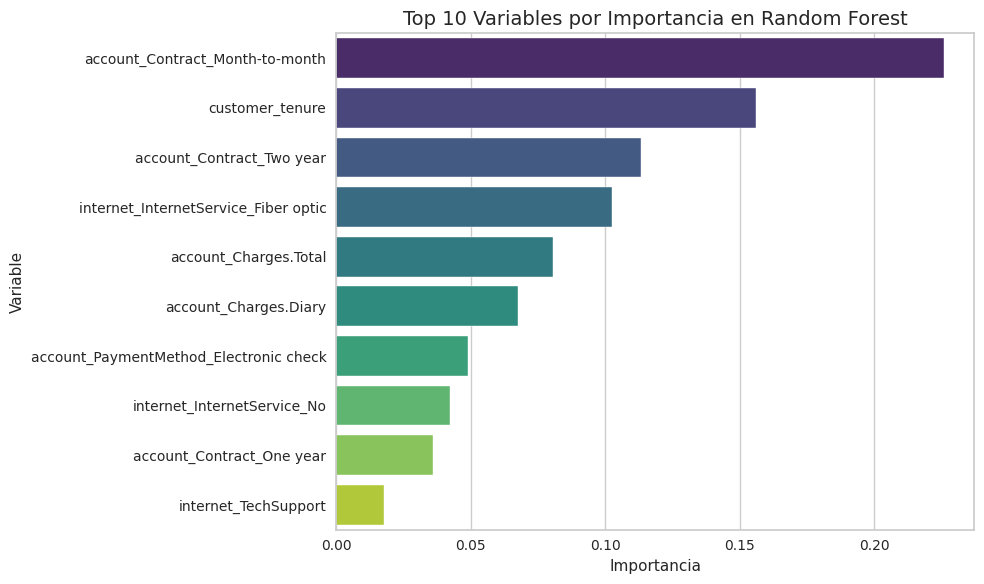

El modelo estimado tiene una calibración que permite identificar cerca del 80% (Recall) de las bajas exitosamente, lo que permitirá anteponerse a las conductas evasivas con estrategias de retención y fidelización. Es importante mencionar que se le dió prioridad a la identificación de evasores a costa de una menor bondad de predicción de clientes que no se dan de baja y que se identifican erroneamente, pues los costos de adquisición de nuevos clientes suelen ser mayores a los de retención, esto tiene un impacto directo sobre los margenes de la empresa a travez del LTV.

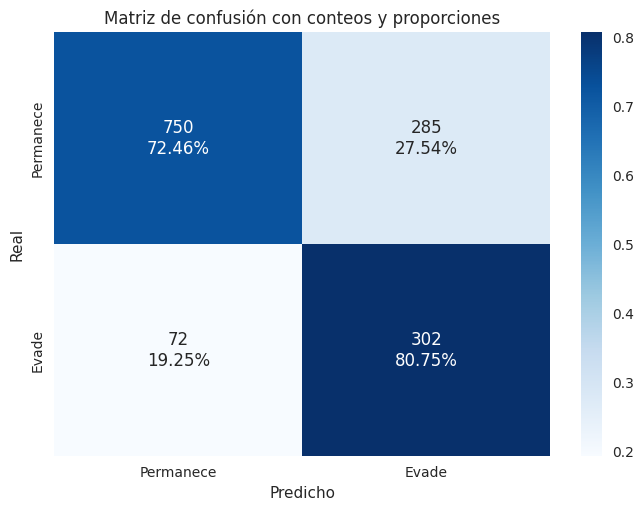

El modelo fue estimado de forma que se balanceo la muestra y se le dió prioridad a la clase mas baja de la variable de respueta (Churn) mediante "Undersampling", pues de esta forma se aseguraban resultados robustos para identificar posibles evasores ante el desafio de tener una muestra desbalancedada en favor de los no evasores.

A continuación se muestra la curva de aprendizaje del modelo para diferentes numeros de datos en entrenamiento y en prueba. Las curvas convergen entre si a medida que aumenta la cantidad de datos, lo que elimina el riesgo de overfitting o underfitting, esto preserva el potencial de generalización del modelo para nuevos clientes.

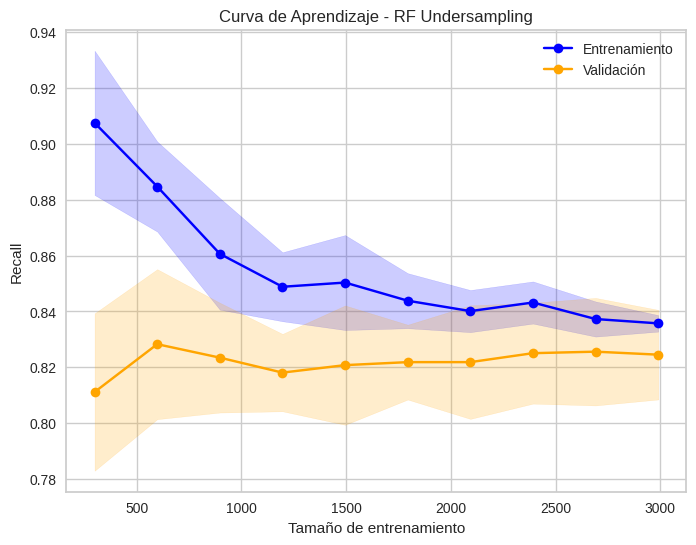

El análisis realizado mediante el modelo de Random Forest permitió identificar con claridad las variables que más influyen en la evasión de clientes, destacando la relevancia de los contratos de corto plazo, la antigüedad del cliente, los contratos de largo plazo y los servicios de internet de fibra óptica, así como los cargos totales y diarios. Estos hallazgos muestran que la estructura de los contratos y la interacción con ciertos servicios son determinantes en la conducta de baja, y que una combinación de múltiples factores, aunque con menor peso individual, contribuye significativamente a la predicción de evasión.

El modelo demuestra una capacidad robusta para identificar aproximadamente el 80% de los clientes que podrían abandonar la empresa, priorizando la retención sobre la precisión en la identificación de clientes que no se dan de baja. Esta estrategia es coherente con la lógica económica de minimizar los costos de adquisición frente a los costos de retención, impactando positivamente en el Customer Lifetime Value (LTV) y, por ende, en la sostenibilidad de los márgenes de la empresa.

Con base en los resultados obtenidos, se recomienda implementar estrategias de prevención y fidelización focalizadas en los clientes con mayor riesgo de evasión. Entre ellas se incluyen:

- Incentivos para la renovación de contratos a largo plazo y beneficios adicionales para clientes con contratos de corto plazo.

- Programas de fidelización personalizados, priorizando a clientes con alto uso de servicios de fibra óptica o con cargos totales elevados.

- Seguimiento proactivo mediante alertas tempranas generadas por el modelo para aplicar medidas preventivas antes de que se produzca la baja.

- Optimización de planes y servicios asociados a los factores críticos identificados, de manera que se reduzcan los motivos de abandono.

La combinación de un modelo predictivo bien calibrado con estrategias de retención focalizadas permite no solo disminuir la tasa de evasión, sino también maximizar el LTV de los clientes, asegurando un crecimiento sostenible y eficiente de la empresa.